# [CREMA-D](https://www.kaggle.com/datasets/ejlok1/cremad)

## Overview

The **CREMA-D** (Crowd-sourced Emotional Multimodal Actors Dataset) contains 7,442 audio clips from 91 actors, including 48 males and 43 females. The actors span a diverse range of ages (20 to 74 years) and represent various races and ethnicities (African American, Asian, Caucasian, Hispanic, and Unspecified). The dataset is designed for emotion recognition tasks, where actors express one of six emotions while delivering pre-determined sentences at varying intensity levels.

## File Naming Format

Each file in the dataset follows the structure: ``<ActorID><Sentence><Emotion>_<EmotionLevel>.wav``

### 1. Actor ID

The first **4 digits** represent the unique ID of the actor:

- `1001` to `1048`: Male actors
- `1002` to `1091`: Female actors

Each actor has a different accent, which adds diversity to the dataset.

### 2. Sentence

The next **3 characters** represent the sentence spoken by the actor. Each sentence has a unique abbreviation made up of its first three letters. Some examples include:

- `DFA`: "Don't Forget A jacket"
- `IEO`: "It's Eleven O' Clock"
- `IOM`: "I'm On My way to the meeting"

There are 12 sentences in total, each having a distinct three-letter code.

### 3. Emotion

The following **3 characters** represent the emotion conveyed in the clip. The dataset covers six distinct emotions:

- `ANG`: Anger
- `DIS`: Disgust
- `FEA`: Fear
- `HAP`: Happy
- `NEU`: Neutral
- `SAD`: Sad

### 4. Emotion Level

The final **2 characters** represent the intensity or level of the expressed emotion. The dataset includes four emotion levels:

- `LO`: Low intensity
- `MD`: Medium intensity
- `HI`: High intensity
- `XX`: Unspecified intensity

### Example Filename

Let's break down the example filename: ``1001_DFA_ANG_XX.wav``

This filename can be interpreted as:

1. **Actor ID**: `1001` (Actor 1, male)
2. **Sentence**: `DFA` ("Don't Forget A jacket")
3. **Emotion**: `ANG` (Anger)
4. **Emotion Level**: `XX` (Unspecified)

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


# Set the style for our plots
plt.style.use('ggplot')
sns.set_palette("deep")


In [3]:
# Set the base directory
base_dir = '/mnt/nvme/DATASETS/audio_ds/emotion_recog/CREMA-D/data'

# Get all wav files in the directory
wav_files = [f for f in os.listdir(base_dir) if f.endswith('.wav')]


In [5]:
# Create a DataFrame with the parsed information
data = []
for filename in wav_files:
    actor_id = filename[:4]
    sentence = filename[5:8]
    emotion = filename[9:12]
    emotion_level = filename[13:15]
    data.append([actor_id, sentence, emotion, emotion_level])

df = pd.DataFrame(data, columns=['ActorID', 'Sentence', 'Emotion', 'EmotionLevel'])
df.head()


,ActorID,Sentence,Emotion,EmotionLevel
0,1001,DFA,ANG,XX
1,1001,DFA,DIS,XX
2,1001,DFA,FEA,XX
3,1001,DFA,HAP,XX
4,1001,DFA,NEU,XX


In [6]:
# Basic dataset information
print(f"Total number of audio clips: {len(df)}")
print(f"Number of unique actors: {df['ActorID'].nunique()}")
print(f"Number of unique sentences: {df['Sentence'].nunique()}")
print(f"Emotions in the dataset: {', '.join(df['Emotion'].unique())}")
print(f"Emotion levels in the dataset: {', '.join(df['EmotionLevel'].unique())}")


Total number of audio clips: 7442
Number of unique actors: 91
Number of unique sentences: 12
Emotions in the dataset: ANG, DIS, FEA, HAP, NEU, SAD
Emotion levels in the dataset: XX, HI, LO, MD, X.


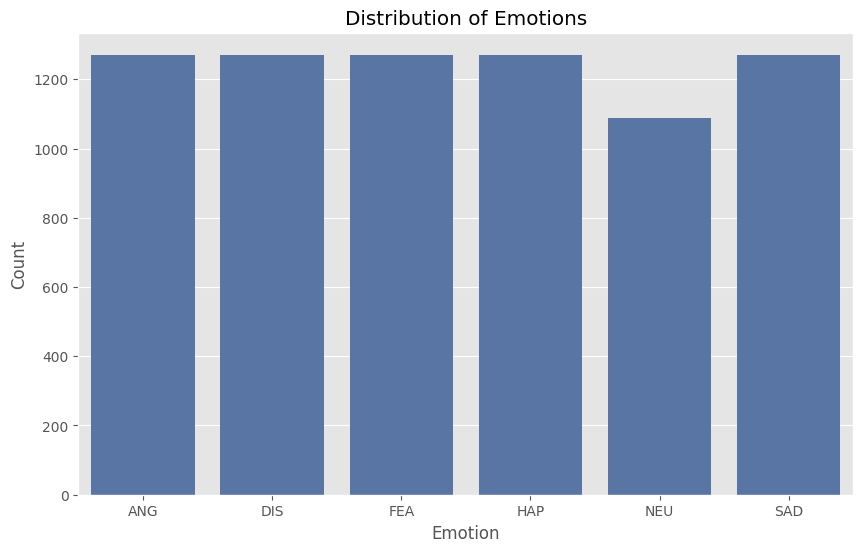

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.savefig('emotion_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
emotion_by_gender = df.groupby(['Gender', 'Emotion']).size().unstack()
emotion_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Emotion Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Distribution of emotion levels
plt.figure(figsize=(10, 6))
df['EmotionLevel'].value_counts().plot(kind='bar')
plt.title('Distribution of Emotion Levels')
plt.xlabel('Emotion Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
